# 1) Model Training

## 1.1 Importing Data and Packages 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

### Importing the Dataset

In [25]:
df=pd.read_csv(r"G:\projects\e2e_mlp\notebook\data\flipkart_mobiles.csv")

df

,Name,Brand,Ratings,No_of_ratings,No_of_reviews,Product_features,MSP,MRP,Discount
0,"realme 9i (Prism Blue, 64 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,10999,15999,31
1,"realme 9i (Prism Black, 64 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,10999,15999,31
2,"realme 9i (Prism Blue, 128 GB)",realme,4.5,25380,1517,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,13499,17999,25
3,"realme 9i (Prism Black, 128 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,10999,16999,35
4,"realme 9i (Prism Blue, 128 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,10999,16999,35
...,...,...,...,...,...,...,...,...,...
617,"MOTOROLA e32 (Eco Black, 64 GB)",MOTOROLA,4.2,123,16,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,9499,11999,20
618,"REDMI Note 9 (Pebble Grey, 128 GB)",REDMI,4.3,"1,23,381",9426,['4 GB RAM | 128 GB ROM | Expandable Upto 512 ...,13499,16499,18
619,"SAMSUNG Galaxy A13 (Blue, 128 GB)",SAMSUNG,4.1,247,19,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,16999,20990,19
620,"REDMI Note 11 Pro (Star Blue, 128 GB)",REDMI,4.1,611,43,"['8 GB RAM | 128 GB ROM', '16.94 cm (6.67 inch...",19395,20689,6


In [26]:
# Converting categorical to numerical columns
df["No_of_ratings"] = df["No_of_ratings"].str.replace(",", "").astype(int)
df["MSP"] = df["MSP"].str.replace(",", "").astype(int)
df["MRP"] = df["MRP"].str.replace(",", "").astype(int)

print(df)

                                      Name     Brand  Ratings  No_of_ratings  \
0            realme 9i (Prism Blue, 64 GB)    realme      4.5         111865   
1           realme 9i (Prism Black, 64 GB)    realme      4.5         111865   
2           realme 9i (Prism Blue, 128 GB)    realme      4.5          25380   
3          realme 9i (Prism Black, 128 GB)    realme      4.5         111865   
4           realme 9i (Prism Blue, 128 GB)    realme      4.5         111865   
..                                     ...       ...      ...            ...   
617        MOTOROLA e32 (Eco Black, 64 GB)  MOTOROLA      4.2            123   
618     REDMI Note 9 (Pebble Grey, 128 GB)     REDMI      4.3         123381   
619      SAMSUNG Galaxy A13 (Blue, 128 GB)   SAMSUNG      4.1            247   
620  REDMI Note 11 Pro (Star Blue, 128 GB)     REDMI      4.1            611   
621    OPPO F21 Pro (Cosmic Black, 128 GB)      OPPO      4.3           1756   

     No_of_reviews                     

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              622 non-null    object 
 1   Brand             622 non-null    object 
 2   Ratings           622 non-null    float64
 3   No_of_ratings     622 non-null    int32  
 4   No_of_reviews     622 non-null    int64  
 5   Product_features  622 non-null    object 
 6   MSP               622 non-null    int32  
 7   MRP               622 non-null    int32  
 8   Discount          622 non-null    int64  
dtypes: float64(1), int32(3), int64(2), object(3)
memory usage: 36.6+ KB


### Top 5 Data Records

In [28]:
df.head()

,Name,Brand,Ratings,No_of_ratings,No_of_reviews,Product_features,MSP,MRP,Discount
0,"realme 9i (Prism Blue, 64 GB)",realme,4.5,111865,6611,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,10999,15999,31
1,"realme 9i (Prism Black, 64 GB)",realme,4.5,111865,6611,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,10999,15999,31
2,"realme 9i (Prism Blue, 128 GB)",realme,4.5,25380,1517,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,13499,17999,25
3,"realme 9i (Prism Black, 128 GB)",realme,4.5,111865,6611,['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,10999,16999,35
4,"realme 9i (Prism Blue, 128 GB)",realme,4.5,111865,6611,['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,10999,16999,35


### Bottom 5 Data Records

In [29]:
df.tail()

,Name,Brand,Ratings,No_of_ratings,No_of_reviews,Product_features,MSP,MRP,Discount
617,"MOTOROLA e32 (Eco Black, 64 GB)",MOTOROLA,4.2,123,16,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,9499,11999,20
618,"REDMI Note 9 (Pebble Grey, 128 GB)",REDMI,4.3,123381,9426,['4 GB RAM | 128 GB ROM | Expandable Upto 512 ...,13499,16499,18
619,"SAMSUNG Galaxy A13 (Blue, 128 GB)",SAMSUNG,4.1,247,19,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,16999,20990,19
620,"REDMI Note 11 Pro (Star Blue, 128 GB)",REDMI,4.1,611,43,"['8 GB RAM | 128 GB ROM', '16.94 cm (6.67 inch...",19395,20689,6
621,"OPPO F21 Pro (Cosmic Black, 128 GB)",OPPO,4.3,1756,149,"['8 GB RAM | 128 GB ROM', '16.33 cm (6.43 inch...",21999,27999,21


# 

# 2) Selection of Features and Target Variables

In [30]:
x = df.drop(columns=["MSP"],axis=1)

print(x)

                                      Name     Brand  Ratings  No_of_ratings  \
0            realme 9i (Prism Blue, 64 GB)    realme      4.5         111865   
1           realme 9i (Prism Black, 64 GB)    realme      4.5         111865   
2           realme 9i (Prism Blue, 128 GB)    realme      4.5          25380   
3          realme 9i (Prism Black, 128 GB)    realme      4.5         111865   
4           realme 9i (Prism Blue, 128 GB)    realme      4.5         111865   
..                                     ...       ...      ...            ...   
617        MOTOROLA e32 (Eco Black, 64 GB)  MOTOROLA      4.2            123   
618     REDMI Note 9 (Pebble Grey, 128 GB)     REDMI      4.3         123381   
619      SAMSUNG Galaxy A13 (Blue, 128 GB)   SAMSUNG      4.1            247   
620  REDMI Note 11 Pro (Star Blue, 128 GB)     REDMI      4.1            611   
621    OPPO F21 Pro (Cosmic Black, 128 GB)      OPPO      4.3           1756   

     No_of_reviews                     

In [31]:
y= df["MSP"]

print(y)

0      10999
1      10999
2      13499
3      10999
4      10999
       ...  
617     9499
618    13499
619    16999
620    19395
621    21999
Name: MSP, Length: 622, dtype: int32


### Performing Standard Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_var = ['Ratings','No_of_ratings', 'No_of_reviews', 'MSP', 'MRP', 'Discount']
print(numerical_var)

['Ratings', 'No_of_ratings', 'No_of_reviews', 'MSP', 'MRP', 'Discount']


In [33]:
df_scaled = df.copy()
df_scaled[numerical_var] = scaler.fit_transform(df[numerical_var])

print(df_scaled[numerical_var])


      Ratings  No_of_ratings  No_of_reviews       MSP       MRP  Discount
0    1.236403       0.837037       0.617728 -0.367333 -0.279037  1.122580
1    1.236403       0.837037       0.617728 -0.367333 -0.279037  1.122580
2    1.236403      -0.280172      -0.360331 -0.225762 -0.183931  0.586225
3    1.236403       0.837037       0.617728 -0.367333 -0.231484  1.480150
4    1.236403       0.837037       0.617728 -0.367333 -0.231484  1.480150
..        ...            ...            ...       ...       ...       ...
617 -0.356917      -0.606441      -0.648526 -0.452276 -0.469250  0.139263
618  0.174189       0.985801       1.158213 -0.225762 -0.255261 -0.039522
619 -0.888024      -0.604839      -0.647950 -0.027561 -0.041699  0.049870
620 -0.888024      -0.600137      -0.643342  0.108121 -0.056013 -1.112232
621  0.174189      -0.585346      -0.622990  0.255582  0.291601  0.228655

[622 rows x 6 columns]


In [34]:
print(df_scaled.head())


                              Name   Brand   Ratings  No_of_ratings  \
0    realme 9i (Prism Blue, 64 GB)  realme  1.236403       0.837037   
1   realme 9i (Prism Black, 64 GB)  realme  1.236403       0.837037   
2   realme 9i (Prism Blue, 128 GB)  realme  1.236403      -0.280172   
3  realme 9i (Prism Black, 128 GB)  realme  1.236403       0.837037   
4   realme 9i (Prism Blue, 128 GB)  realme  1.236403       0.837037   

   No_of_reviews                                   Product_features       MSP  \
0       0.617728  ['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'... -0.367333   
1       0.617728  ['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'... -0.367333   
2      -0.360331  ['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB... -0.225762   
3       0.617728  ['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB... -0.367333   
4       0.617728  ['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB... -0.367333   

        MRP  Discount  
0 -0.279037  1.122580  
1 -0.279037  1.122580  
2 -0.183931  0

### Model Selection after Scaling

In [35]:
x_scaled = df_scaled.drop(columns=["Name","Brand","Product_features","MSP"],axis=1)
print(x_scaled)

y_scaled= df_scaled["MSP"]
print(y_scaled)

print("x_shape_input:",x_scaled.shape)
print("y_shape_target:",y_scaled.shape)

      Ratings  No_of_ratings  No_of_reviews       MRP  Discount
0    1.236403       0.837037       0.617728 -0.279037  1.122580
1    1.236403       0.837037       0.617728 -0.279037  1.122580
2    1.236403      -0.280172      -0.360331 -0.183931  0.586225
3    1.236403       0.837037       0.617728 -0.231484  1.480150
4    1.236403       0.837037       0.617728 -0.231484  1.480150
..        ...            ...            ...       ...       ...
617 -0.356917      -0.606441      -0.648526 -0.469250  0.139263
618  0.174189       0.985801       1.158213 -0.255261 -0.039522
619 -0.888024      -0.604839      -0.647950 -0.041699  0.049870
620 -0.888024      -0.600137      -0.643342 -0.056013 -1.112232
621  0.174189      -0.585346      -0.622990  0.291601  0.228655

[622 rows x 5 columns]
0     -0.367333
1     -0.367333
2     -0.225762
3     -0.367333
4     -0.367333
         ...   
617   -0.452276
618   -0.225762
619   -0.027561
620    0.108121
621    0.255582
Name: MSP, Length: 622, dtype: f

In [36]:
# spliting data into Training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=42)

print("x_train_shape :", x_train.shape)
print("x_test_shape:",x_test.shape)
print("y_train_shape :", x_train.shape)
print("y_test_shape :", x_test.shape)

x_train_shape : (497, 5)
x_test_shape: (125, 5)
y_train_shape : (497, 5)
y_test_shape : (125, 5)


# 

# 3) Model Evaluation

### Evaluate Function for Model Metrics

In [37]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square      

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine": SVR(),
    "XGBoost": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

model_list = []
r2_list = []


In [38]:
# Evaluate Training and Testing dataset

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) 
    
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae = mean_absolute_error(y_train, y_train_pred)
    model_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    model_train_r2 = r2_score(y_train, y_train_pred)

    model_test_mae = mean_absolute_error(y_test, y_test_pred)
    model_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    model_test_r2 = r2_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1344
- Mean Absolute Error: 0.0788
- R2 Score: 0.9791
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1479
- Mean Absolute Error: 0.0846
- R2 Score: 0.9857


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 0.1344
- Mean Absolute Error: 0.0790
- R2 Score: 0.9791
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1493
- Mean Absolute Error: 0.0851
- R2 Score: 0.9854


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 0.9295
- Mean Absolute Error: 0.5863
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.2428
- Mean Absolute Error: 0.7146
- R2 Score: -0.0119


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
--------

### Results

In [39]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=["Model_Names", "R2_Scores"]).sort_values(by=["R2_Scores"],ascending = False)

,Model_Names,R2_Scores
3,Decision Tree,0.989840
0,Linear Regression,0.985670
1,Ridge Regression,0.985390
7,XGBoost,0.983021
4,Random Forest,0.979638
8,AdaBoost,0.973734
6,Support Vector Machine,0.964877
5,K-Nearest Neighbors,0.959124
2,Lasso Regression,-0.011932


### Evaluating the accuracy of the model

In [40]:
# Linear Regression
 
lin_model = LinearRegression(fit_intercept=True)
lin_model_fit = lin_model.fit(x_train,y_train)
y_pred = lin_model_fit.predict(x_test)
score= r2_score(y_test,y_pred)*100

print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 98.57


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

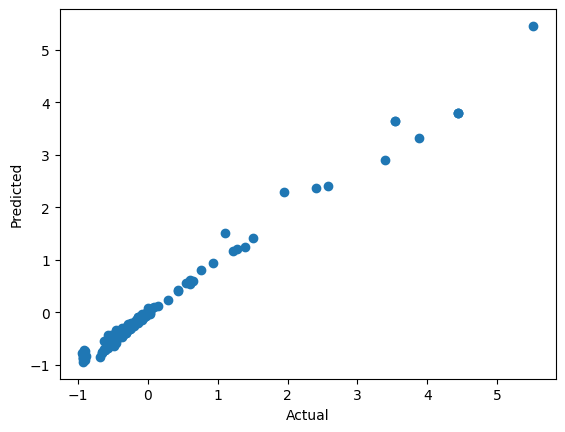

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='MSP'>

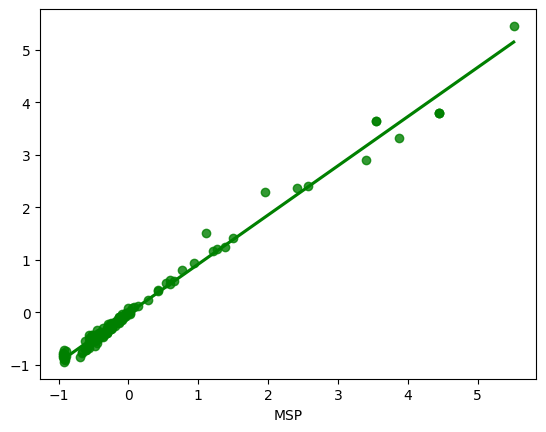

In [42]:
sns.regplot(x=y_test,y=y_pred,ci = None,color="green")

### Difference between Actual and Predicted Values

In [43]:
pred_df = pd.DataFrame({"Actual_Values":y_test,"Predicted_Values":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual_Values,Predicted_Values,Difference
249,-0.140819,-0.086244,-0.054575
399,-0.480591,-0.421016,-0.059575
174,-0.423962,-0.399565,-0.024397
280,-0.237088,-0.296078,0.058990
110,-0.169133,-0.144833,-0.024300
...,...,...,...
6,-0.588185,-0.666404,0.078218
104,-0.028071,-0.037901,0.009830
114,-0.226271,-0.229095,0.002824
354,0.538725,0.556032,-0.017307
